Task 2: UNEMPLOYMENT ANALYSIS WITH PYTHON

Unemployment is measured by the unemployment rate which is the number of people
 who are unemployed as a percentage of the total labour force. We have seen a sharp
 increase in the unemployment rate during Covid-19, so analyzing the unemployment rate
 can be a good data science project. 

##  Importing Libraries


In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load and Inspect Dataset

In [2]:

# Load dataset
df = pd.read_csv("Unemployment in India.csv")

# Display first few rows
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [3]:
# Display dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


## Data Cleaning & Preprocessing

### Handling missing valus

In [4]:
# check for missing values
df.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [5]:
df.dropna(inplace=True)
df.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

In [6]:
print(df.shape)

(740, 7)


## Exploratory Data Analysis (EDA) 

In [7]:
# Remove leading and trailing spaces from column names
df.columns = df.columns.str.strip()


In [8]:
# Convert Date column to datetime format
df["Date"] = pd.to_datetime(df["Date"])


In [9]:
# Display summary statistics
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [10]:
# Unique values in categorical columns
print(df["Region"].nunique(), "regions")
print("Unique values in Area column:", df["Area"].unique())

28 regions
Unique values in Area column: ['Rural' 'Urban']


### Data Visualization

**Distribution of Unemployment Rate in India**

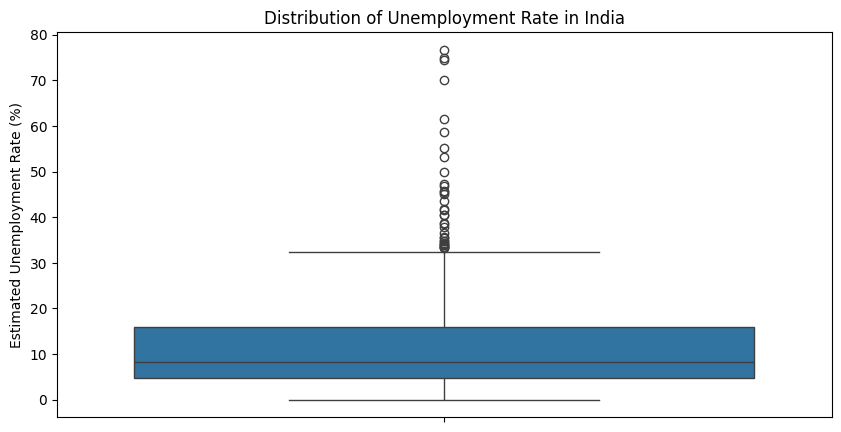

In [11]:
# Distribution of Unemployment Rate in India

plt.figure(figsize=(10, 5))
sns.boxplot(df["Estimated Unemployment Rate (%)"])
plt.title("Distribution of Unemployment Rate in India")
plt.show()


In [12]:
#Add a rolling average for better trend visualization
df["Rolling_Avg"] = df["Estimated Unemployment Rate (%)"].rolling(window=5).mean()

**Unemployment Rate Trends Over Time**

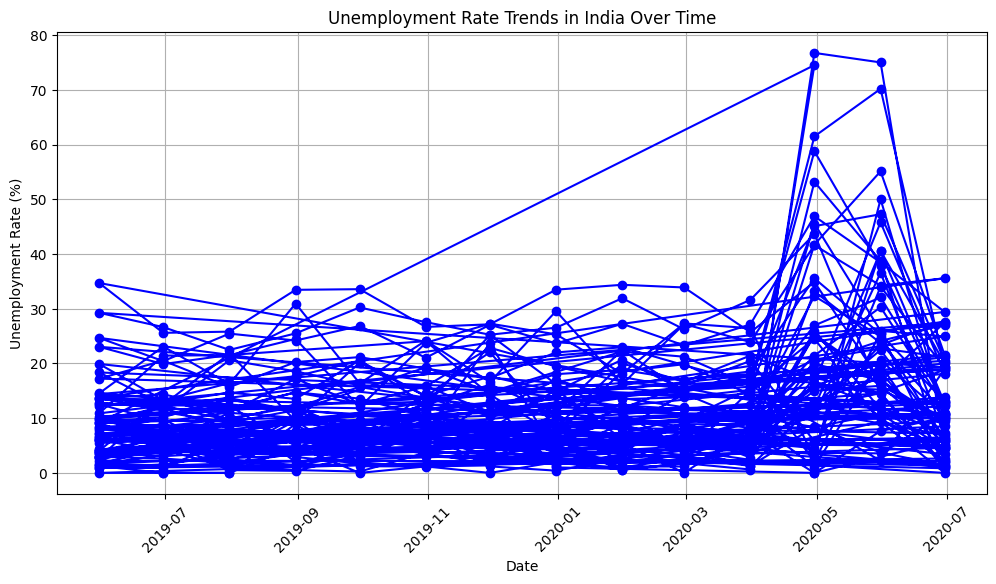

In [ ]:
# Unemployment Rate Trends Over Time
plt.figure(figsize=(12, 6))
plt.plot(df["Date"], df["Estimated Unemployment Rate (%)"], marker="o", linestyle="-", color="b")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.title("Unemployment Rate Trends in India Over Time")
plt.xticks(rotation=45)
plt.grid()
plt.show()


The unemployment rate was relatively stable until early 2020.
A sharp spike occurred around March–May 2020, likely due to COVID-19 lockdowns.
After peaking above 70%, the unemployment rate gradually declined.

**Unemployment Rate by Region**

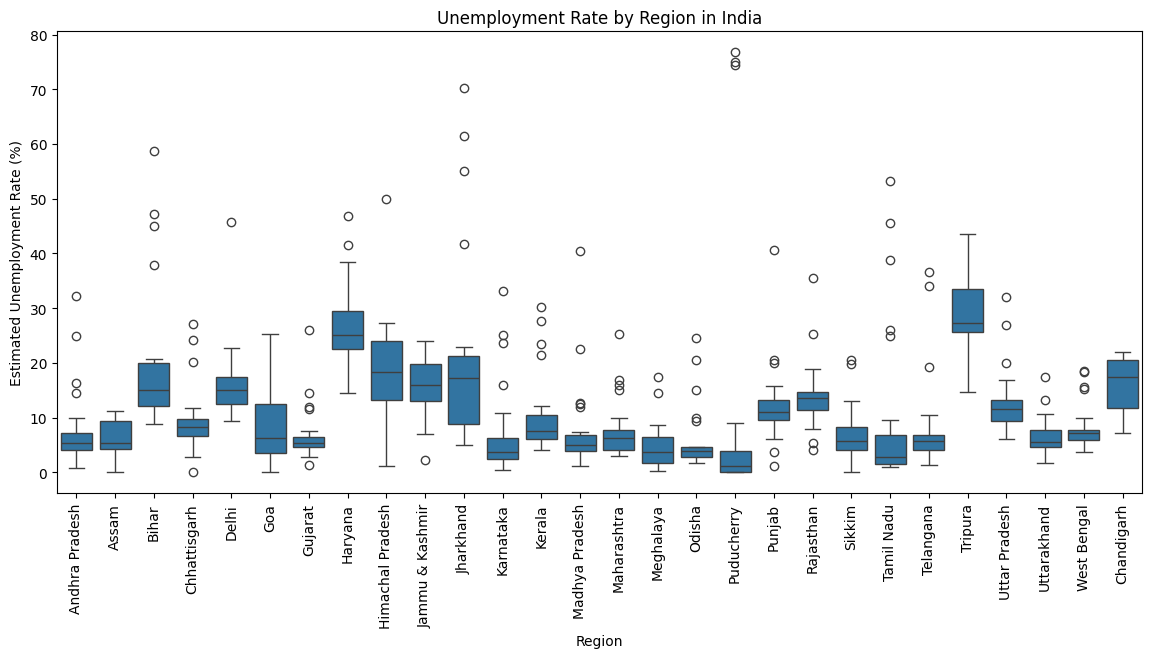

In [ ]:
# Unemployment Rate by Region
plt.figure(figsize=(14, 6))
sns.boxplot(x="Region", y="Estimated Unemployment Rate (%)", data=df)
plt.xticks(rotation=90)
plt.title("Unemployment Rate by Region in India")
plt.show()


Some regions have consistently low unemployment (e.g., Kerala, Karnataka, Maharashtra).

Others have high variability and frequent outliers (e.g., Haryana, Jammu & Kashmir, Tripura).

Some states experienced extreme spikes (above 50-70%) during specific time periods.

**Unemployment Rate Comparison (Urban vs Rural)**

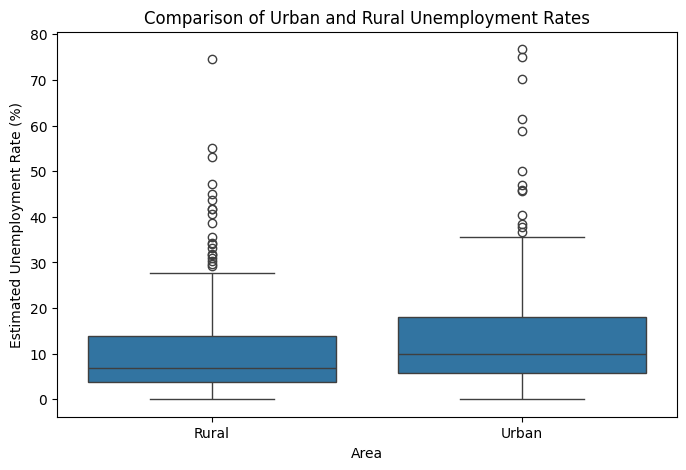

In [15]:
#Unemployment Rate Comparison (Urban vs Rural)
plt.figure(figsize=(8, 5))
sns.boxplot(x="Area", y="Estimated Unemployment Rate (%)", data=df)
plt.title("Comparison of Urban and Rural Unemployment Rates")
plt.show()


Urban areas show slightly higher median unemployment than rural areas. 

Rural areas have more extreme outliers, including some unemployment rates above 70%.

Both distributions are skewed with high variability.

**Correlation Heatmap**

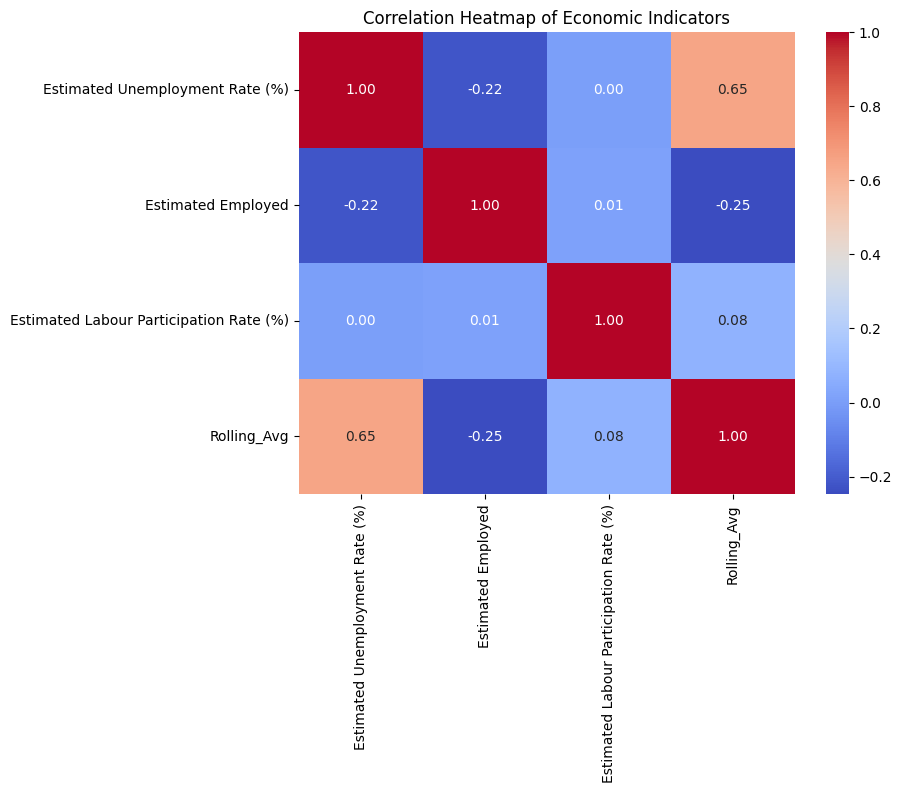

In [16]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Economic Indicators")
plt.show()


Unemployment Rate vs. Employment (-0.22)

Weak negative correlation → As employment increases, unemployment slightly decreases.
Not a strong inverse relationship, suggesting other factors influence unemployment.
Unemployment Rate vs. Labour Participation (0.00)

No correlation → Labour force participation does not impact unemployment.
This suggests structural issues where people may be looking for jobs but not finding them.
Employment vs. Labour Participation (0.01)

No significant relationship.

 **Average Unemployment Rate by Region**

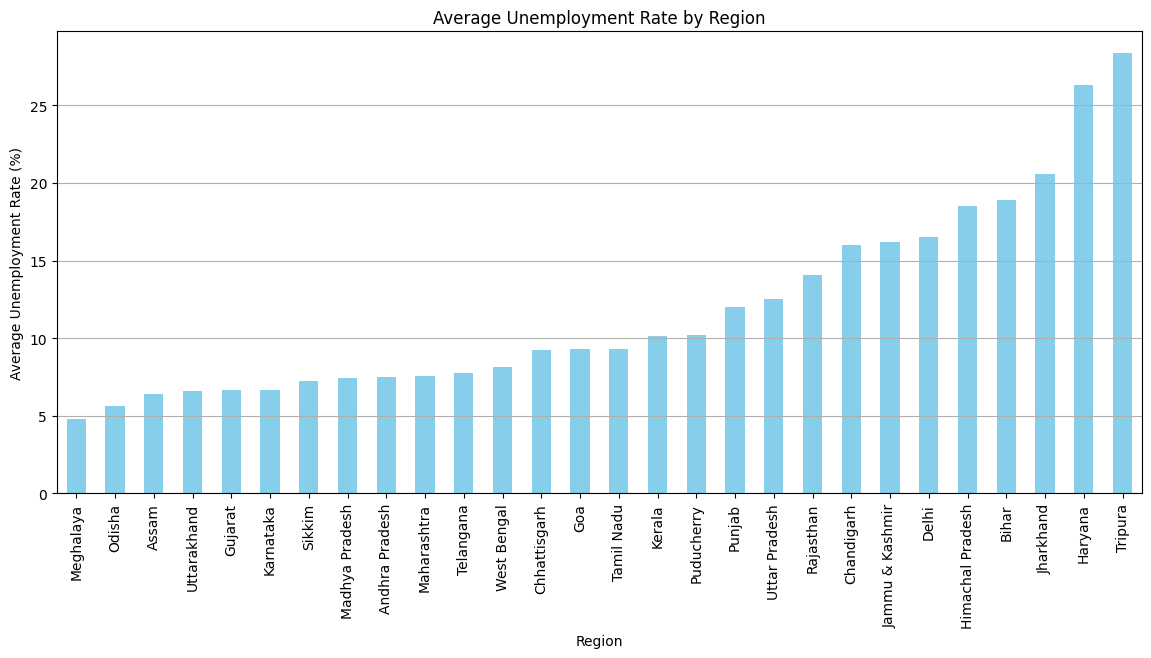

In [17]:
# Average unemployment rate by region
avg_unemployment_by_region = df.groupby("Region")["Estimated Unemployment Rate (%)"].mean()

# Plotting
plt.figure(figsize=(14, 6))
avg_unemployment_by_region.sort_values().plot(kind="bar", color="skyblue")
plt.title("Average Unemployment Rate by Region")
plt.xlabel("Region")
plt.ylabel("Average Unemployment Rate (%)")
plt.xticks(rotation=90)
plt.grid(axis="y")
plt.show()


**Urban vs Rural Distribution of Unemployment Rates**

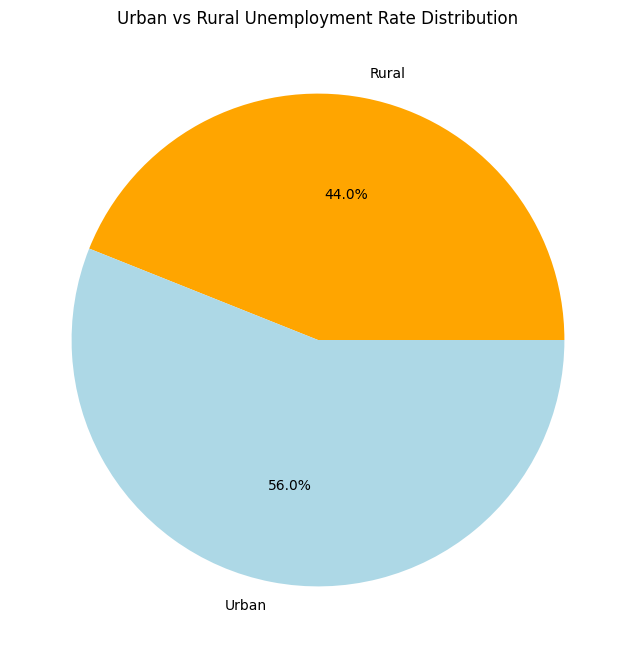

In [18]:
# Average unemployment rate for urban and rural areas
avg_unemployment_by_area = df.groupby("Area")["Estimated Unemployment Rate (%)"].mean()

# Plotting
plt.figure(figsize=(8, 8))
avg_unemployment_by_area.plot(kind="pie", autopct="%1.1f%%", colors=["orange", "lightblue"])
plt.title("Urban vs Rural Unemployment Rate Distribution")
plt.ylabel("")  # Hides the y-label for better presentation
plt.show()


## Conclusion:
This analysis highlights unemployment trends across regions and between urban and rural areas in India. The findings provide actionable insights for policymakers to address unemployment challenges effectively.